### 20. Valid Parentheses

In [ ]:
class Solution:
    def isValid(self, s: str) -> bool:
        if len(s) % 2 != 0:
            return False
        stack = []
        for c in s:
            if c in '[{(':
                stack.append(c)
            elif c in '}])' and stack != []:
                t = stack.pop()
                if c == '}' and t != '{' or c == ')' and t != '(' or c == ']' and t != '[':
                    return False
            elif c in '}])' and stack == []:
                return False
        if stack != []:
            return False
        return True

- The way I implemented the solution was to iterate over the string `s` and push any opening parantheses onto the `stack`, and whenever there is a closing parantheses, it has to be the closing parantheses to the opening parantheses on top of the `stack`, which we retrieve with `pop()`.
- If there are still opening parantheses on the stack after iterating through `s`, or if there are closing parantheses while the `stack` is empty, `s` is not valid.

### 84. Largest Rectangle in Histogram

In [ ]:
class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        maxAr = 0
        stack = []
        pushed = False
        for i, h in enumerate(heights):
            if not pushed:
                stack.append([i, h])
            else:
                pushed = False
            # curr > right
            if i < len(heights)-1 and heights[i+1] < h:
                # pop from stack until top no longer greater than right
                index = 0
                while stack != []:
                    top = stack.pop()
                    area = (i+1 - top[0]) * top[1]
                    if area > maxAr:
                        maxAr = area
                    if top[1] > heights[i+1]:
                        index = top[0]
                    else:
                        stack.append(top)
                        break
                # push right neighbor with adjusted index
                stack.append([index, heights[i+1]])
                pushed = True
                continue
        while stack != []:
            top = stack.pop()
            area = (len(heights) - top[0]) * top[1]
            if area > maxAr:
                maxAr = area

        return maxAr

- How it works is that we iterate over `heights`, and whenever the right neighbor's height is greater or equal to the current height, we `push` the current height `h` onto the `stack`, along with its index `i`.
- When the right neighbor is smaller, we `pop` from the `stack` and calculate the `area` between the index of `top` and the current index `i`, until the `top` element is no longer taller than the right neighbor, and `push` the right neighbor onto the stack with the `index` of the last element `popped` from the `stack`.

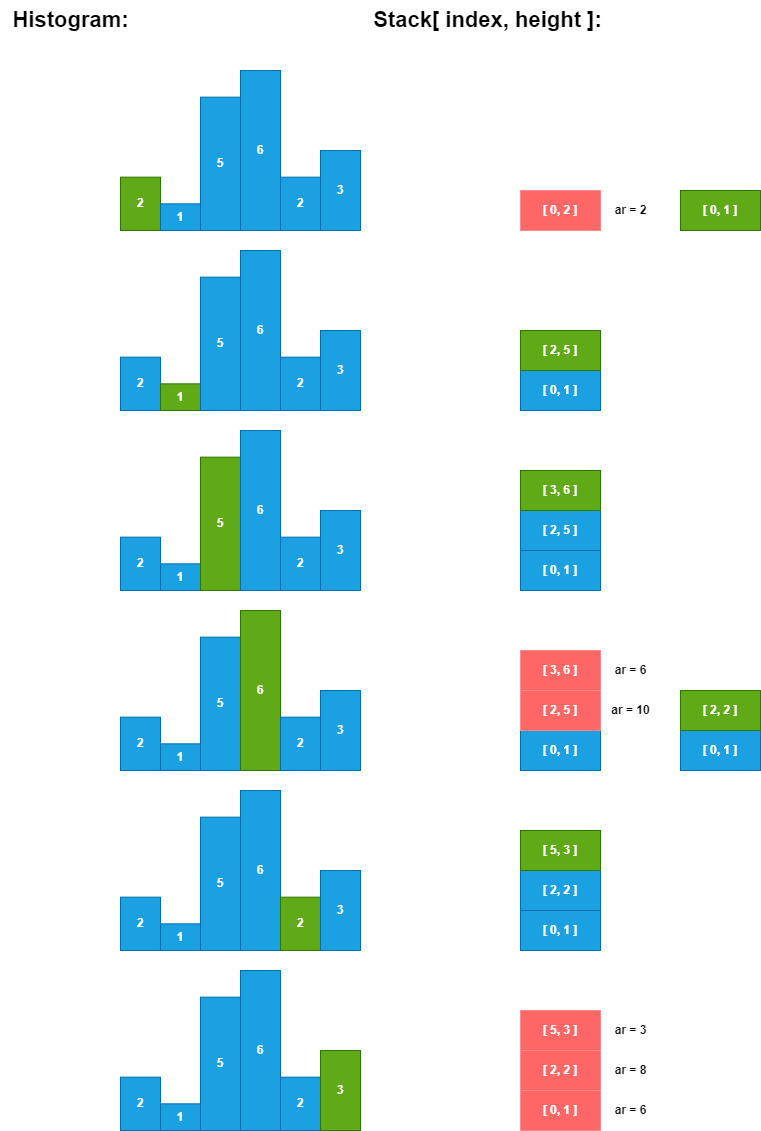

### 150. Evaluate Reverse Polish Notation 

In [ ]:
class Solution:
    def evalRPN(self, tokens: List[str]) -> int:
        stack = []
        for token in tokens:
            #print(f'token: {token} stack: {stack}')
            try:
                num = int(token)
                stack.append(num)
            except ValueError:
                num1 = stack.pop()
                num2 = stack.pop()
                if token == '+':
                    stack.append(num1 + num2)
                elif token == '*':
                    stack.append(num1 * num2)
                elif token == '-':
                    stack.append(num2 - num1)
                elif token == '/':
                    stack.append(int(num2 / num1))
        return stack.pop()

- This works by iterating over the list of `tokens` and pushing every number `num` onto the stack, and whenever we encounter an arithmetic operator, we pop the two elements on top of the stack, `num1` and `num2`, and push the result of the arithmetic operation back onto the stack.
- The last remaining value on the stack will be our return value.

### 155. Min Stack

In [ ]:
class MinStack:
    def __init__(self):
        self.s1 = []
        self.s2 = []

    def push(self, val: int) -> None:
        self.s1.append(val)
        if self.s2 == [] or self.s2 != [] and val <= self.s2[-1]:
            self.s2.append(val)
        #print(f'push: {self.s1}, {self.s2}')
        
    def pop(self) -> None:
        val = self.s1.pop()
        if val == self.s2[-1]:
            self.s2.pop()
        #print(f'pop: {self.s1}, {self.s2}')

    def top(self) -> int:
        #print(f'top: {self.s1}, {self.s2}')
        return self.s1[-1]

    def getMin(self) -> int:
        #print(f'getMin: {self.s1}, {self.s2}')
        return self.s2[-1]


# Your MinStack object will be instantiated and called as such:
# obj = MinStack()
# obj.push(val)
# obj.pop()
# param_3 = obj.top()
# param_4 = obj.getMin()

- I approached this problem by utilizing two stacks, `s1` and `s2`, where `s1` holds the actual values of the stack and `s2` saves information about the current minimum in `s1`.
- Whenever a value is pushed onto `s1` and the value is less or equal to the `top` element in `s2`, it will be pushed onto `s2` as the current minimum of `s1`.
- When an element is popped from `s1` and it is equal to the `top` element in `s2`, that means we are popping the current minimum of `s1`, and the element will also be popped from `s2`.

### 739. Daily Temperatures

In [ ]:
class Solution:
    def dailyTemperatures(self, temperatures: List[int]) -> List[int]:
        stack = []
        res = [0] * len(temperatures)
        for i,temp in enumerate(temperatures):
            if not i == len(temperatures) - 1:
                right = temperatures[i+1]
                # right > curr
                if right > temp:
                    res[i] = 1
                    while stack != [] and stack[-1][0] < right:
                        top = stack.pop()
                        res[top[1]] = i+1 - top[1]
                # right <= curr
                else:
                    stack.append([temp, i])
                # print(f'c: {temp} r: {temperatures[i+1]} s: {stack} res: {res}')
        return res

- This time around, I have utilized a `stack` to reduce the time complexity to O(m*n), where `m` is the size of the stack and `n` is the length of `temperatures`.
- We iterate through `temperatures` and whenever our `right` neighbor is smaller, we push the current `temp` onto the stack along with its index `i`.
- Whenever we encounter a `right` neighbor that is larger, we `pop` from the `stack` and write the distance between the `top` element and `right` into `res`, until the `top` value is no longer smaller than `right`.
- To better understand how this works, I have created a graphic below.

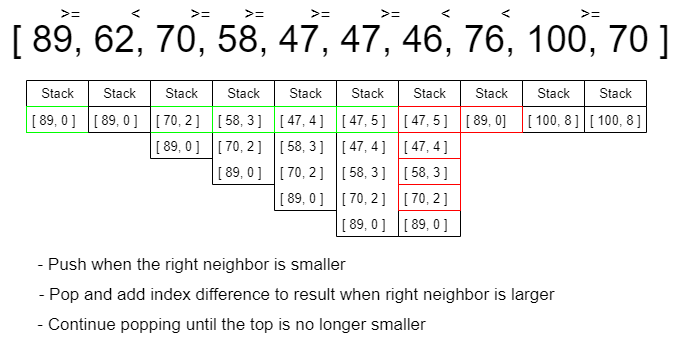

### 853. Car Fleet

In [ ]:
class Solution:
    def carFleet(self, target: int, position: List[int], speed: List[int]) -> int:
        # l holds tuples (pos, speed) sorted and in reverse order
        l = list(zip(position, speed))
        l.sort(key=lambda a: a[0])
        l = list(reversed(l))
        stack = []
        for car in l:
            stack.append(car)
            if len(stack) > 1:
                # if time to target of top <= time to target of previous top
                if (target - stack[-1][0]) / stack[-1][1] <= (target - stack[-2][0]) / stack[-2][1]:
                    stack.pop()
        return len(stack)

- The way it works is that we create a list of tuples `l` combining `position` and `speed` of every car and sorting it by `position`, such that it represents the order of the cars on the racetrack.
- Then we traverse `l` in reverse order, starting with the car closest to the `target`.
- On every iteration, we push the current car onto the `stack`, and if there are at least two cars on the `stack`, we compare the time they require to reach the target, and if the current car requires less time to reach the `target`, it will be `popped` from the stack.
- This way, the length of the `stack` keeps track of the number of `fleets` there are, because when the current car requires less time to reach its `target`, it will bump into the previous car, which is the car ahead of it on the racetrack.
- What we are left with is a `stack` containing the leaders of the respective `fleets`

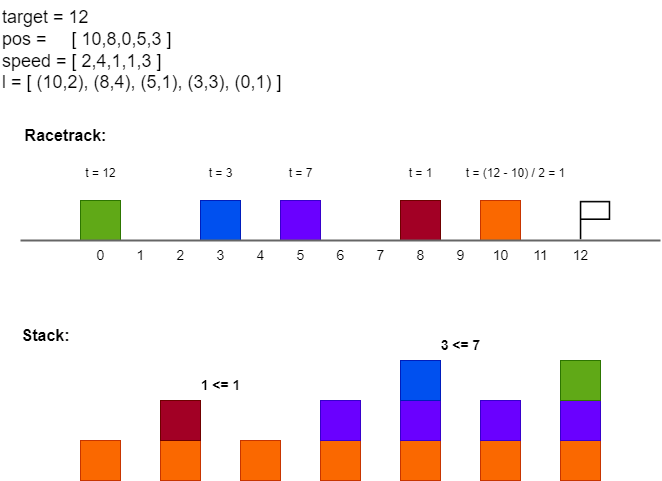